# Objective

Identifying any potential business problems within the dataset, analyze the data, visualize the findings. In this case, using the datset to predict the Sales and Profit.

# Importing the libaries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

import os
os.getcwd()
# os.chdir("C:\Users\HP")
# os.getcwd()

pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import various functions from scipy
from scipy import stats

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import scipy.stats
from scipy import stats


# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier

#import libraries for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification


# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import random


# Importing the Dataset

In [3]:
df = pd.read_csv('Superstore 2023.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000000,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,2,0.000000,41.913600
1,2,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.000000,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000,3,0.000000,219.582000
2,3,CA-2020-138688,12/06/2022 00:00:00,16/06/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.000000,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.000000,6.871400
3,4,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.000000,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5,0.450000,-383.031000
4,5,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.000000,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.200000,2.516400


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.000000,4997.500000,2885.163629,1.000000,2499.250000,4997.500000,7495.750000,9994.000000
Postal Code,9983.000000,55245.233297,32038.715955,1040.000000,23223.000000,57103.000000,90008.000000,99301.000000
Sales,9994.000000,229.858001,623.245101,0.444000,17.280000,54.490000,209.940000,22638.480000
Quantity,9994.000000,3.789574,2.225110,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,9994.000000,0.156203,0.206452,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,9994.000000,28.656896,234.260108,-6599.978000,1.728750,8.666500,29.364000,8399.976000


In [5]:
#findthe number of rows and columns
df.shape

(9994, 21)

There are 9994 rows and 21 columns.

# Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [7]:
#check for missing and duplicate values
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.duplicated().sum()

0

There are no duplicate  values.

# EDA

In [10]:
#replacing 'Row_Id' with index
df.set_index('Row ID',inplace = True)

In [11]:
df.shape

(9994, 20)

In [12]:
#extrcating 'year' from 'order date'
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Year'] = df['Year'].astype('int')

In [13]:
#working with categorical variables
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [14]:
df_cat['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [15]:
df_cat['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [16]:
df_cat['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [17]:
df_cat['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [18]:
df_cat['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [19]:
df_cat['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [20]:
df_cat['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [21]:
df_cat['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [22]:
df_cat['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [23]:
df_cat['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [24]:
df_cat['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [25]:
#removing unnecessary column
df_cat.drop(columns= 'Country/Region', inplace = True)

In [26]:
df_cat = df_cat.astype('category')
df_cat.shape

(9994, 14)

There are total 14 categorical columns.

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Order ID       9994 non-null   category
 1   Order Date     9994 non-null   category
 2   Ship Date      9994 non-null   category
 3   Ship Mode      9994 non-null   category
 4   Customer ID    9994 non-null   category
 5   Customer Name  9994 non-null   category
 6   Segment        9994 non-null   category
 7   City           9994 non-null   category
 8   State          9994 non-null   category
 9   Region         9994 non-null   category
 10  Product ID     9994 non-null   category
 11  Category       9994 non-null   category
 12  Sub-Category   9994 non-null   category
 13  Product Name   9994 non-null   category
dtypes: category(14)
memory usage: 803.7 KB


In [28]:
#working with categorical variables
df_num = df.select_dtypes(include = np.number)
df_num.columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'], dtype='object')

In [29]:
#removing unnecessary column
df_num.drop(columns= 'Postal Code', inplace=True)
df_num.shape

(9994, 5)

There are total 5 numerical columns

In [30]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     9994 non-null   float64
 1   Quantity  9994 non-null   int64  
 2   Discount  9994 non-null   float64
 3   Profit    9994 non-null   float64
 4   Year      9994 non-null   int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 429.4 KB


AxesSubplot(0.125,0.653529;0.227941x0.226471)
AxesSubplot(0.398529,0.653529;0.227941x0.226471)
AxesSubplot(0.672059,0.653529;0.227941x0.226471)
AxesSubplot(0.125,0.381765;0.227941x0.226471)
AxesSubplot(0.398529,0.381765;0.227941x0.226471)
AxesSubplot(0.672059,0.381765;0.227941x0.226471)


Text(0.5, 1.0, 'Sub-Categories')

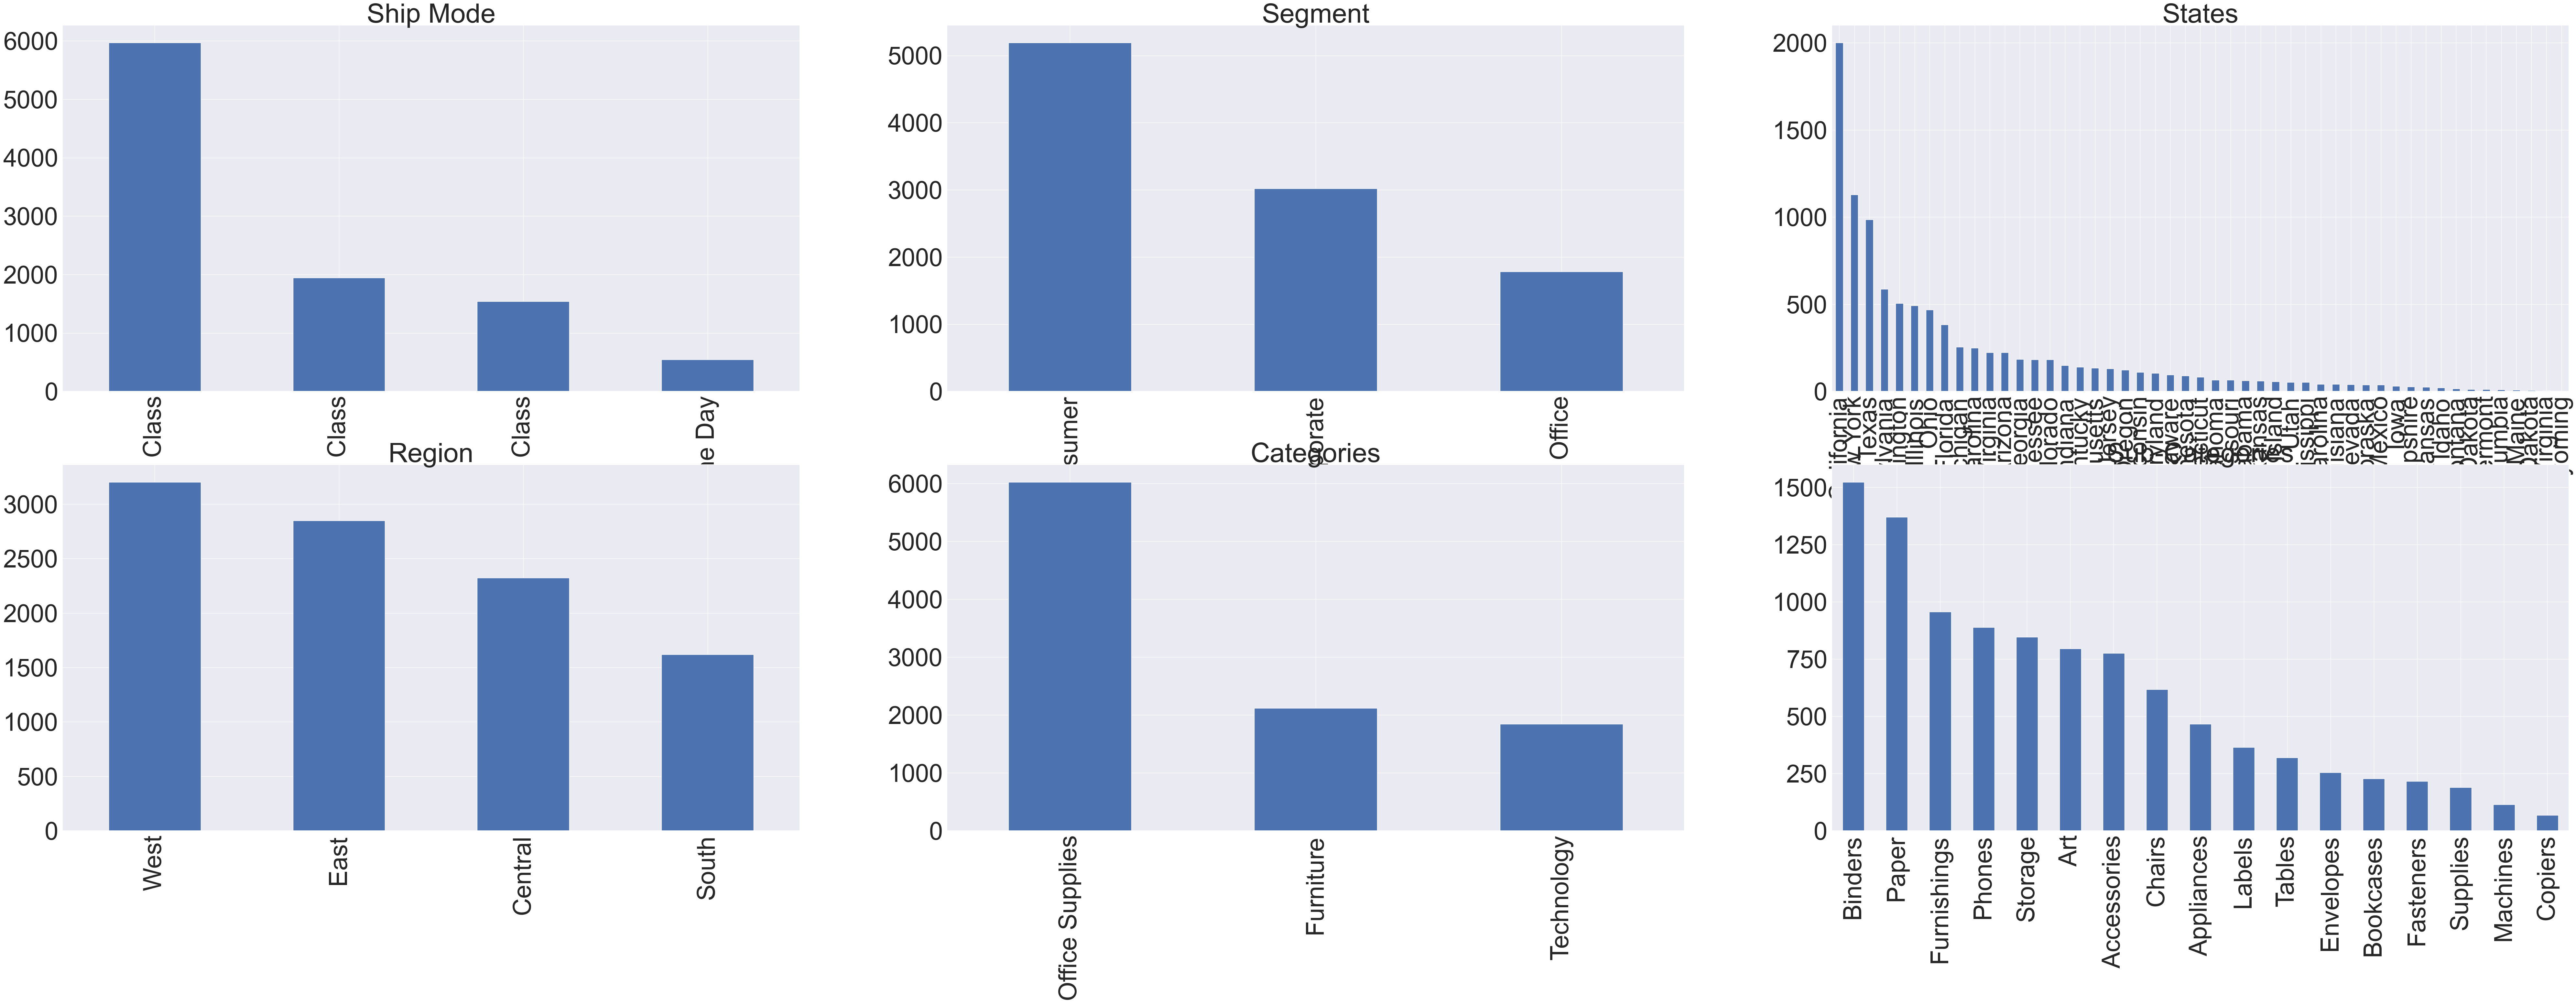

In [31]:
#plotting 'bar graphs' for individual categorial variables
plt.figure(figsize = (100,50))
sns.set(font_scale = 5)
plt.subplot(331)
plt.title('Ship Mode')
print(df_cat['Ship Mode'].value_counts().plot(kind="bar"))
plt.subplot(332)
plt.title('Segment')
print(df_cat['Segment'].value_counts().plot(kind="bar"))
plt.subplot(333)
plt.title('States')
print(df_cat['State'].value_counts().plot(kind="bar"))
plt.subplot(334)
print(df_cat['Region'].value_counts().plot(kind="bar"))
plt.title('Region')
plt.subplot(335)
print(df_cat['Category'].value_counts().plot(kind="bar"))
plt.title('Categories')
plt.subplot(336)
print(df_cat['Sub-Category'].value_counts().plot(kind="bar"))
plt.title('Sub-Categories')

The sate of California has the highest sales and profit at an average. Most of the profitable and highest selling products include Office Supplies. Most of the products are profitable around the West Region. Among the office supplies, the highest selling products are binders.

<AxesSubplot:xlabel='Sales', ylabel='Density'>

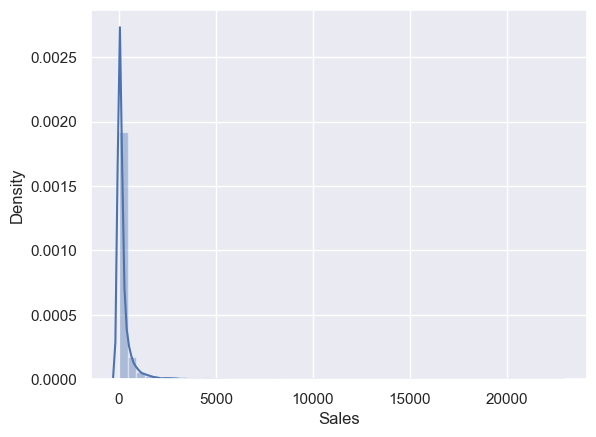

In [32]:
#checking if the target variables are normally distributed or not
sns.set(font_scale = 1)
sns.distplot(df["Sales"])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

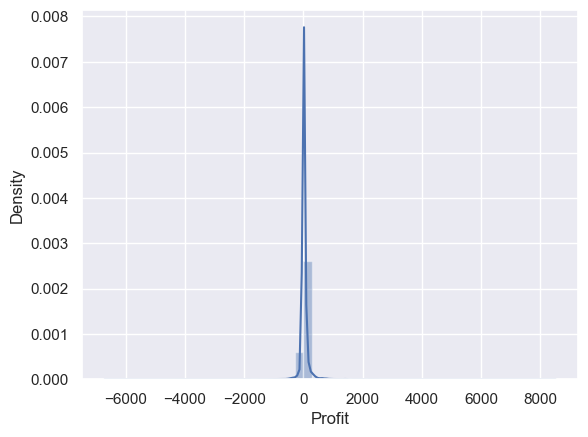

In [33]:
sns.set(font_scale = 1)
sns.distplot(df["Profit"])

<AxesSubplot:xlabel='Category', ylabel='Profit'>

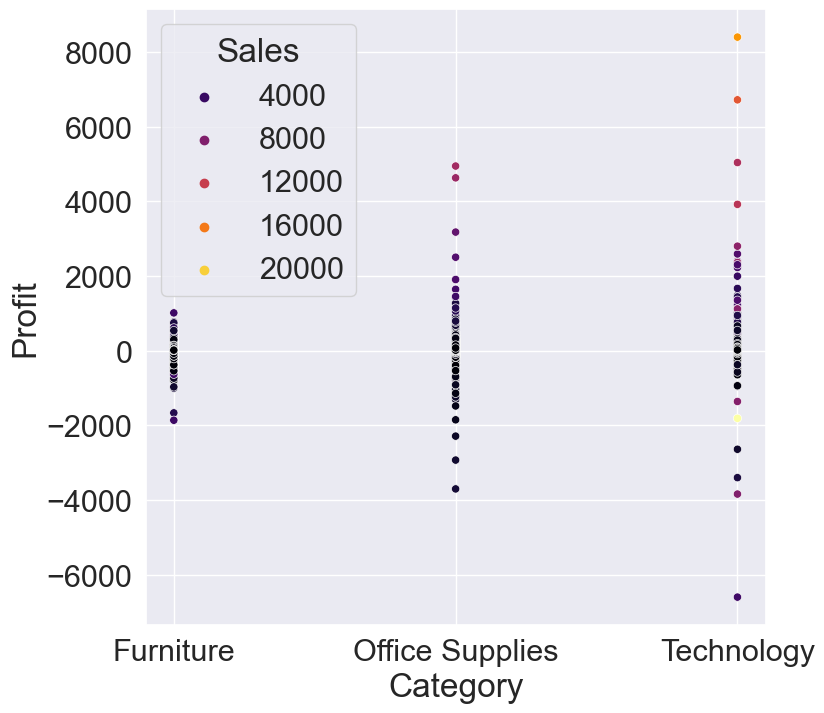

In [34]:
#checking the sales and profit using scatter plots 
plt.figure(figsize = (8,8))
sns.set(font_scale = 2)
sns.scatterplot(x = 'Category', y = 'Profit', hue = 'Sales', palette = 'inferno', data = df)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

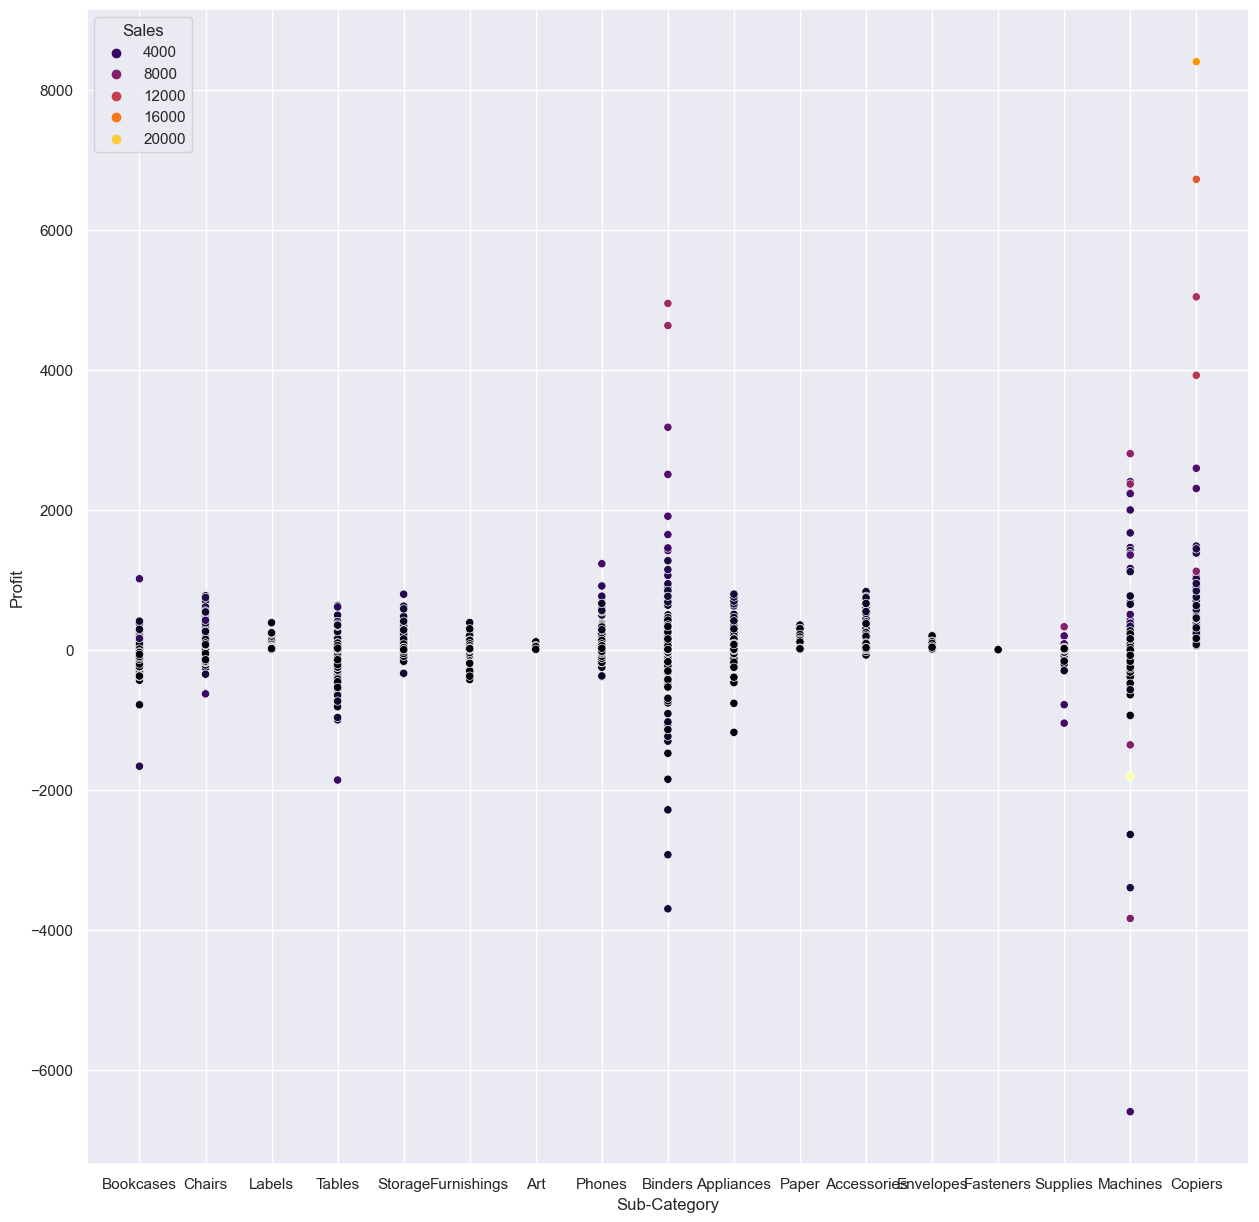

In [35]:
plt.figure(figsize = (15,15))
sns.set(font_scale = 1)
sns.scatterplot(x = 'Sub-Category', y = 'Profit', hue = 'Sales', palette = 'inferno', data = df)

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

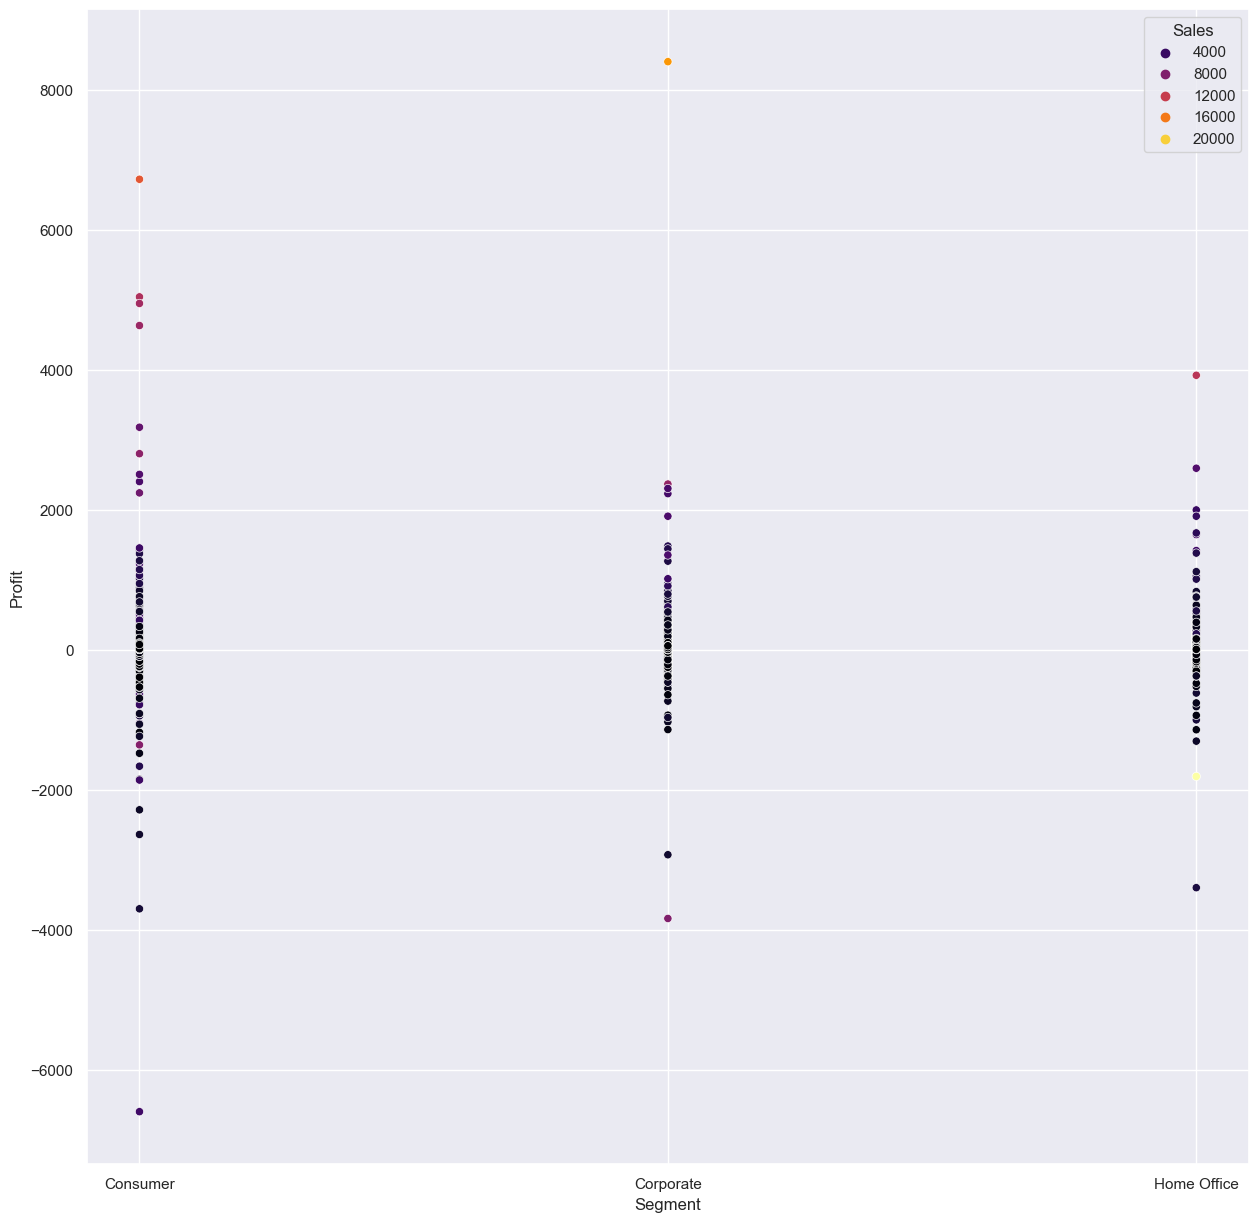

In [36]:
plt.figure(figsize = (15,15))
sns.set(font_scale = 1)
sns.scatterplot(x = 'Segment', y = 'Profit', hue = 'Sales', palette = 'inferno', data = df)

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

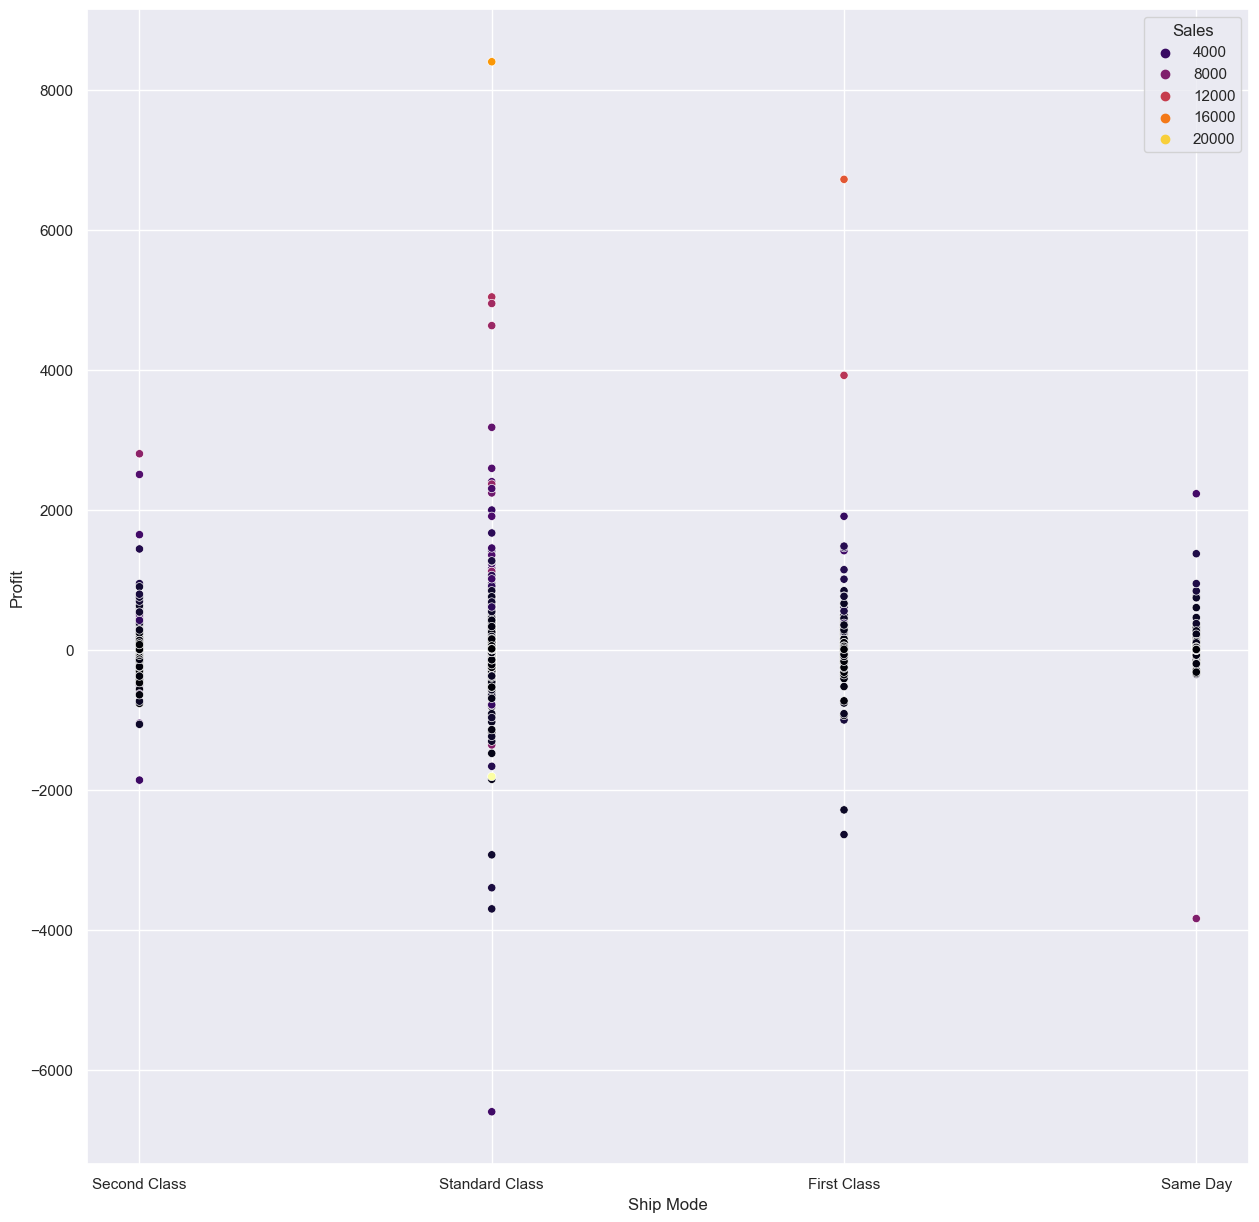

In [37]:
plt.figure(figsize = (15,15))
sns.set(font_scale = 1)
sns.scatterplot(x = 'Ship Mode', y = 'Profit', hue = 'Sales', palette = 'inferno', data = df)

<AxesSubplot:xlabel='Year', ylabel='Profit'>

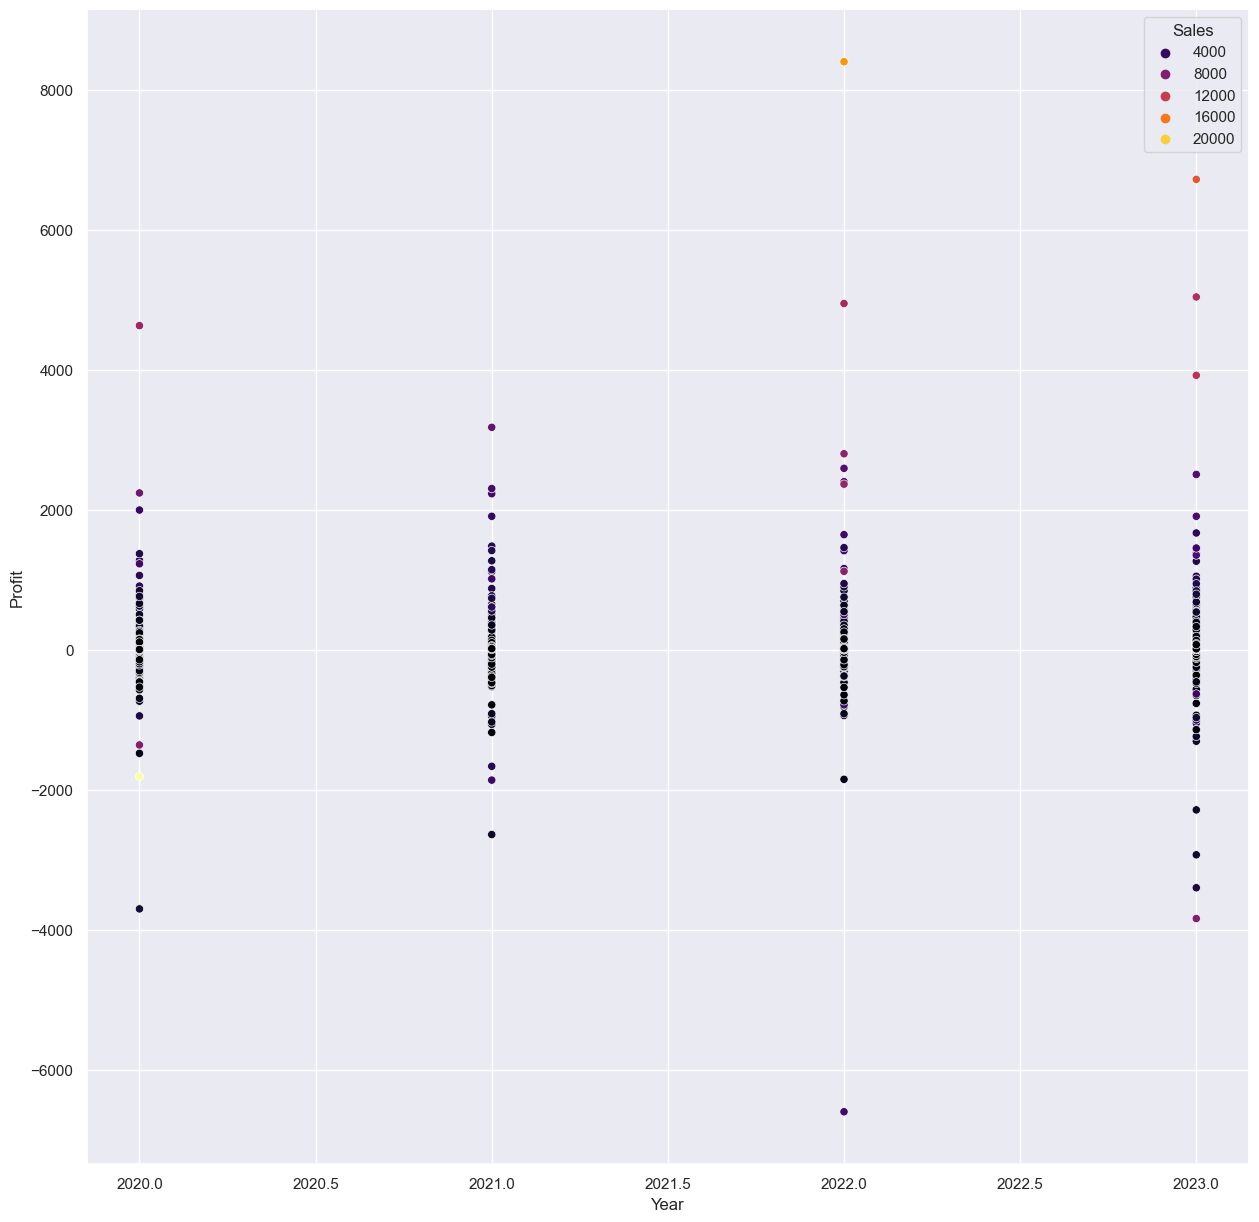

In [38]:
plt.figure(figsize = (15,15))
sns.set(font_scale = 1)
sns.scatterplot(x = 'Year', y = 'Profit', hue = 'Sales', palette = 'inferno', data = df)

Furnitures provide the minimum loss. Copiers are highly profitable. The year 2023 was highly profitable. Products shipped in 'First Class' have a standard rate of profit.

In [39]:
#using Label encoder
from sklearn.preprocessing import LabelEncoder
df_cat[['Order ID','Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name']] = df_cat[['Order ID','Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name']].apply(LabelEncoder().fit_transform)

In [40]:
#concatenating numerical and categorical data
data = pd.concat([df_num, df_cat], axis = 1)
data.head()

,Sales,Quantity,Discount,Profit,Year,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
Row ID,,,,,,,,,,,,,,,,,,,
1,261.960000,2,0.000000,41.913600,2022,2501,317,477,2,143,166,0,194,15,2,12,0,4,386
2,731.940000,3,0.000000,219.582000,2022,2501,317,477,2,143,166,0,194,15,2,55,0,5,838
3,14.620000,2,0.000000,6.871400,2022,2297,460,674,2,237,201,1,266,3,3,946,1,10,1432
4,957.577500,5,0.450000,-383.031000,2021,4372,435,775,3,705,687,0,153,8,2,319,0,16,366
5,22.368000,2,0.200000,2.516400,2021,4372,435,775,3,705,687,0,153,8,2,1316,1,14,572


In [41]:
data.shape

(9994, 19)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales          9994 non-null   float64
 1   Quantity       9994 non-null   int64  
 2   Discount       9994 non-null   float64
 3   Profit         9994 non-null   float64
 4   Year           9994 non-null   int32  
 5   Order ID       9994 non-null   int32  
 6   Order Date     9994 non-null   int32  
 7   Ship Date      9994 non-null   int32  
 8   Ship Mode      9994 non-null   int32  
 9   Customer ID    9994 non-null   int32  
 10  Customer Name  9994 non-null   int32  
 11  Segment        9994 non-null   int32  
 12  City           9994 non-null   int32  
 13  State          9994 non-null   int32  
 14  Region         9994 non-null   int32  
 15  Product ID     9994 non-null   int32  
 16  Category       9994 non-null   int32  
 17  Sub-Category   9994 non-null   int32  
 18  Product 

In [43]:
#five point summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,9994.000000,229.858001,623.245101,0.444000,17.280000,54.490000,209.940000,22638.480000
Quantity,9994.000000,3.789574,2.225110,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,9994.000000,0.156203,0.206452,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,9994.000000,28.656896,234.260108,-6599.978000,1.728750,8.666500,29.364000,8399.976000
Year,9994.000000,2021.722233,1.123555,2020.000000,2021.000000,2022.000000,2023.000000,2023.000000
Order ID,9994.000000,2495.493296,1460.671776,0.000000,1199.250000,2498.500000,3759.750000,5008.000000
Order Date,9994.000000,608.921153,354.784787,0.000000,304.000000,605.000000,916.000000,1235.000000
Ship Date,9994.000000,677.002201,383.919467,0.000000,345.000000,680.000000,1017.000000,1333.000000
Ship Mode,9994.000000,2.235041,1.100880,0.000000,2.000000,3.000000,3.000000,3.000000
Customer ID,9994.000000,400.460376,228.585576,0.000000,205.250000,405.500000,602.000000,792.000000


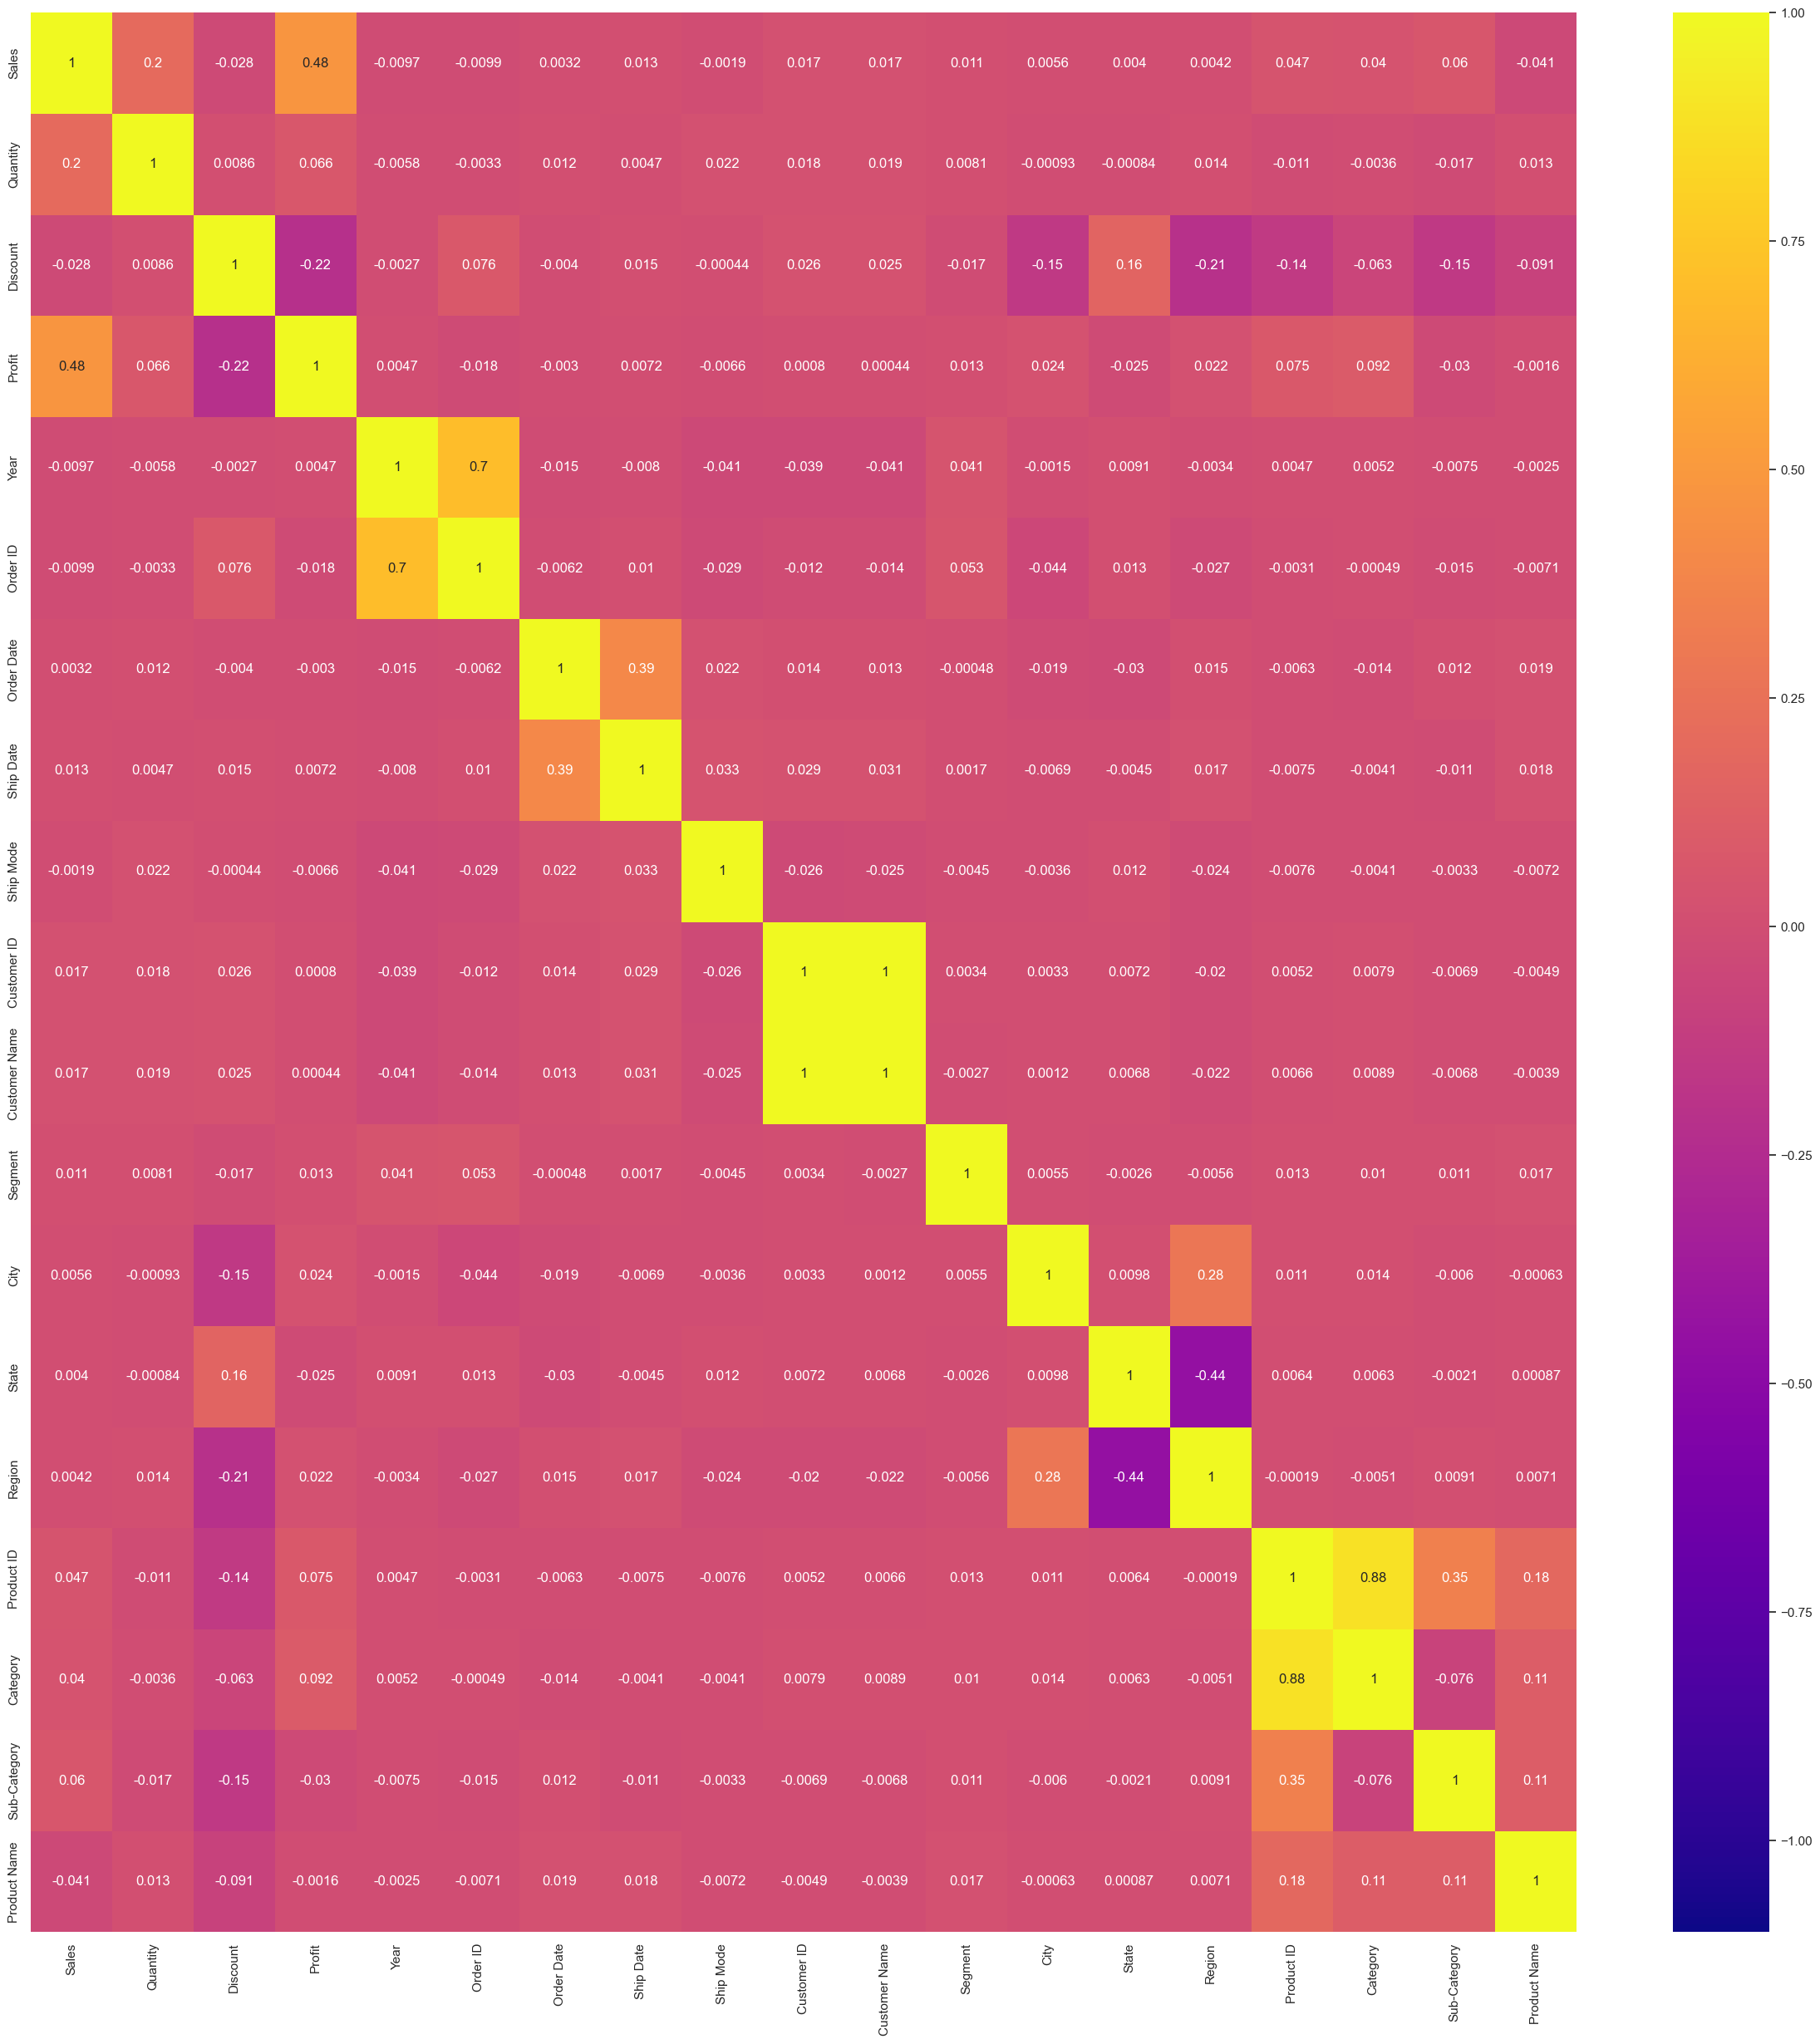

In [44]:
#heatmap
plt.figure(figsize=(30,30))
sns.set(font_scale = 1)
sns.heatmap(data.corr(),cmap='plasma',annot=True,vmin=1.0,vmax=-1.0,annot_kws={"size":12})
plt.show()

The 'Product Name' and 'Ship Mode' exhibit strong positive correlation with Sales and PRofit while 'Discount' exhibits negative correlation.

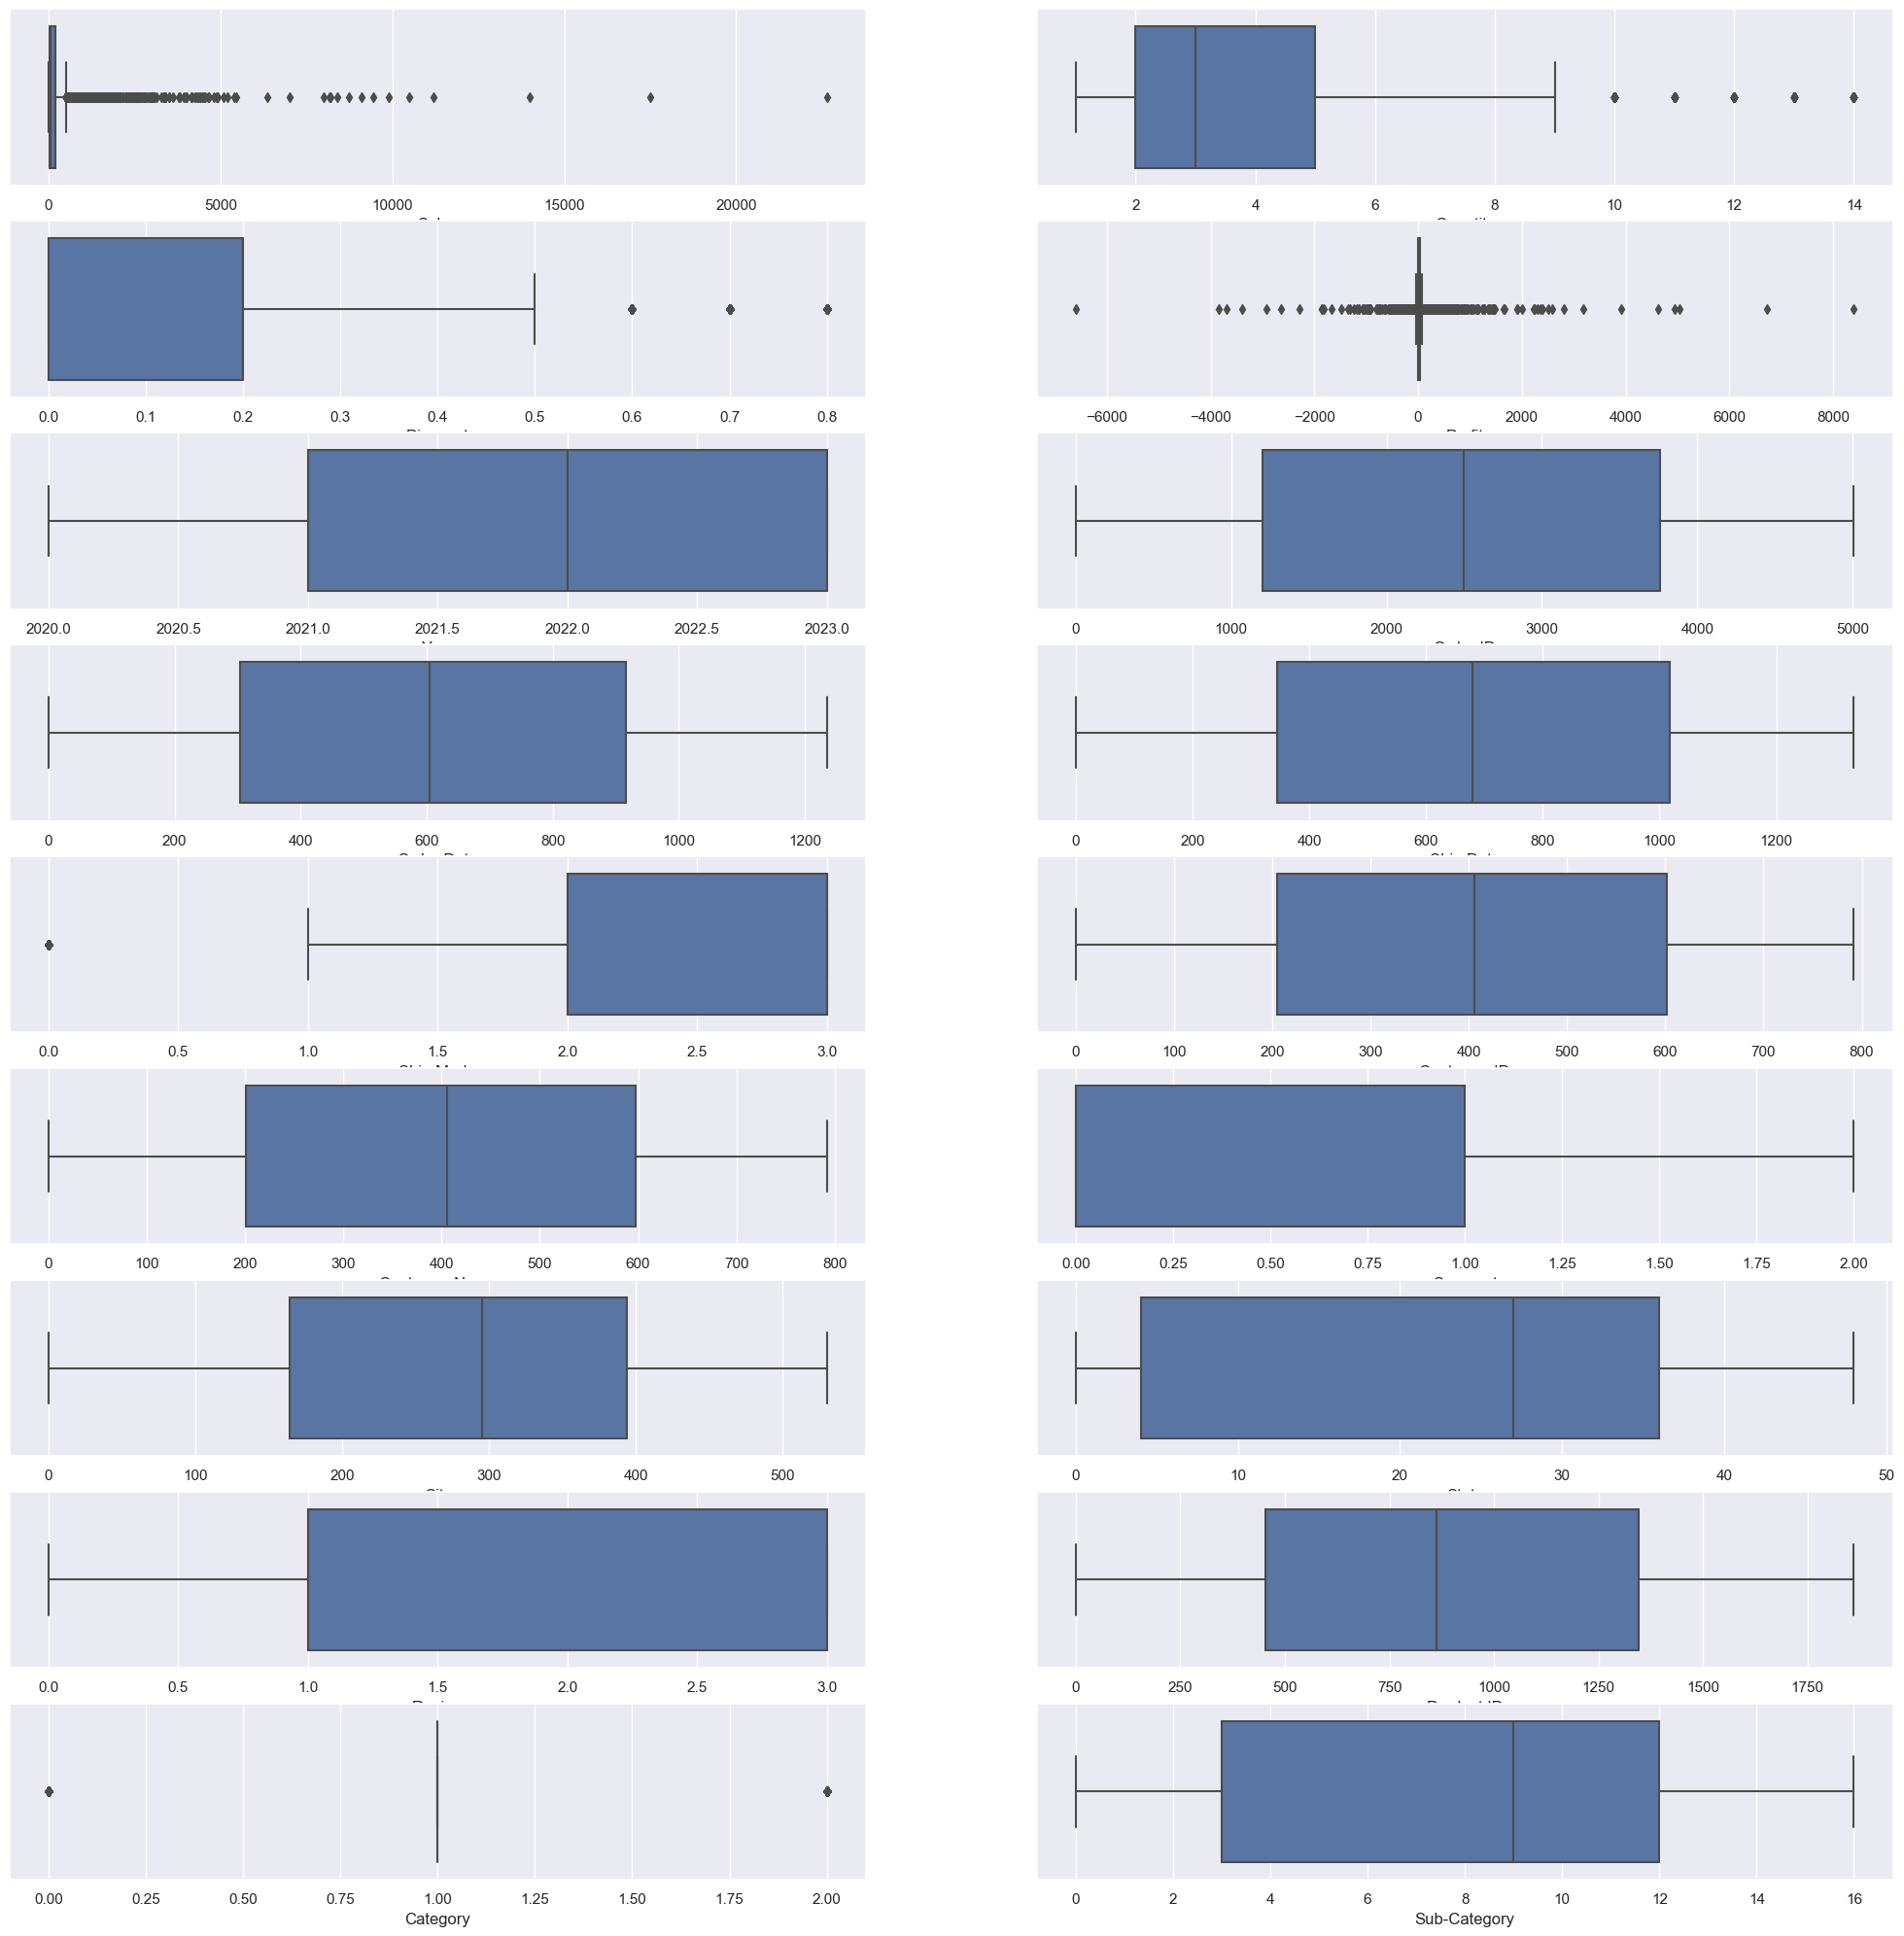

In [45]:
#plotting box plots for outlier detection
fig,ax = plt.subplots(9,2,figsize=(25,25))
sns.set(font_scale = 1)
for var,subplot in zip(data.columns,ax.flatten()):
    sns.boxplot(data[var],ax=subplot)
plt.show()

In [46]:
# detecting and capping the outliers

for col in data.columns:
    percentiles = data[col].quantile([0.01,0.99]).values
    data[col][data[col] <= percentiles[0]] = percentiles[0]
    data[col][data[col] >= percentiles[1]] = percentiles[1]

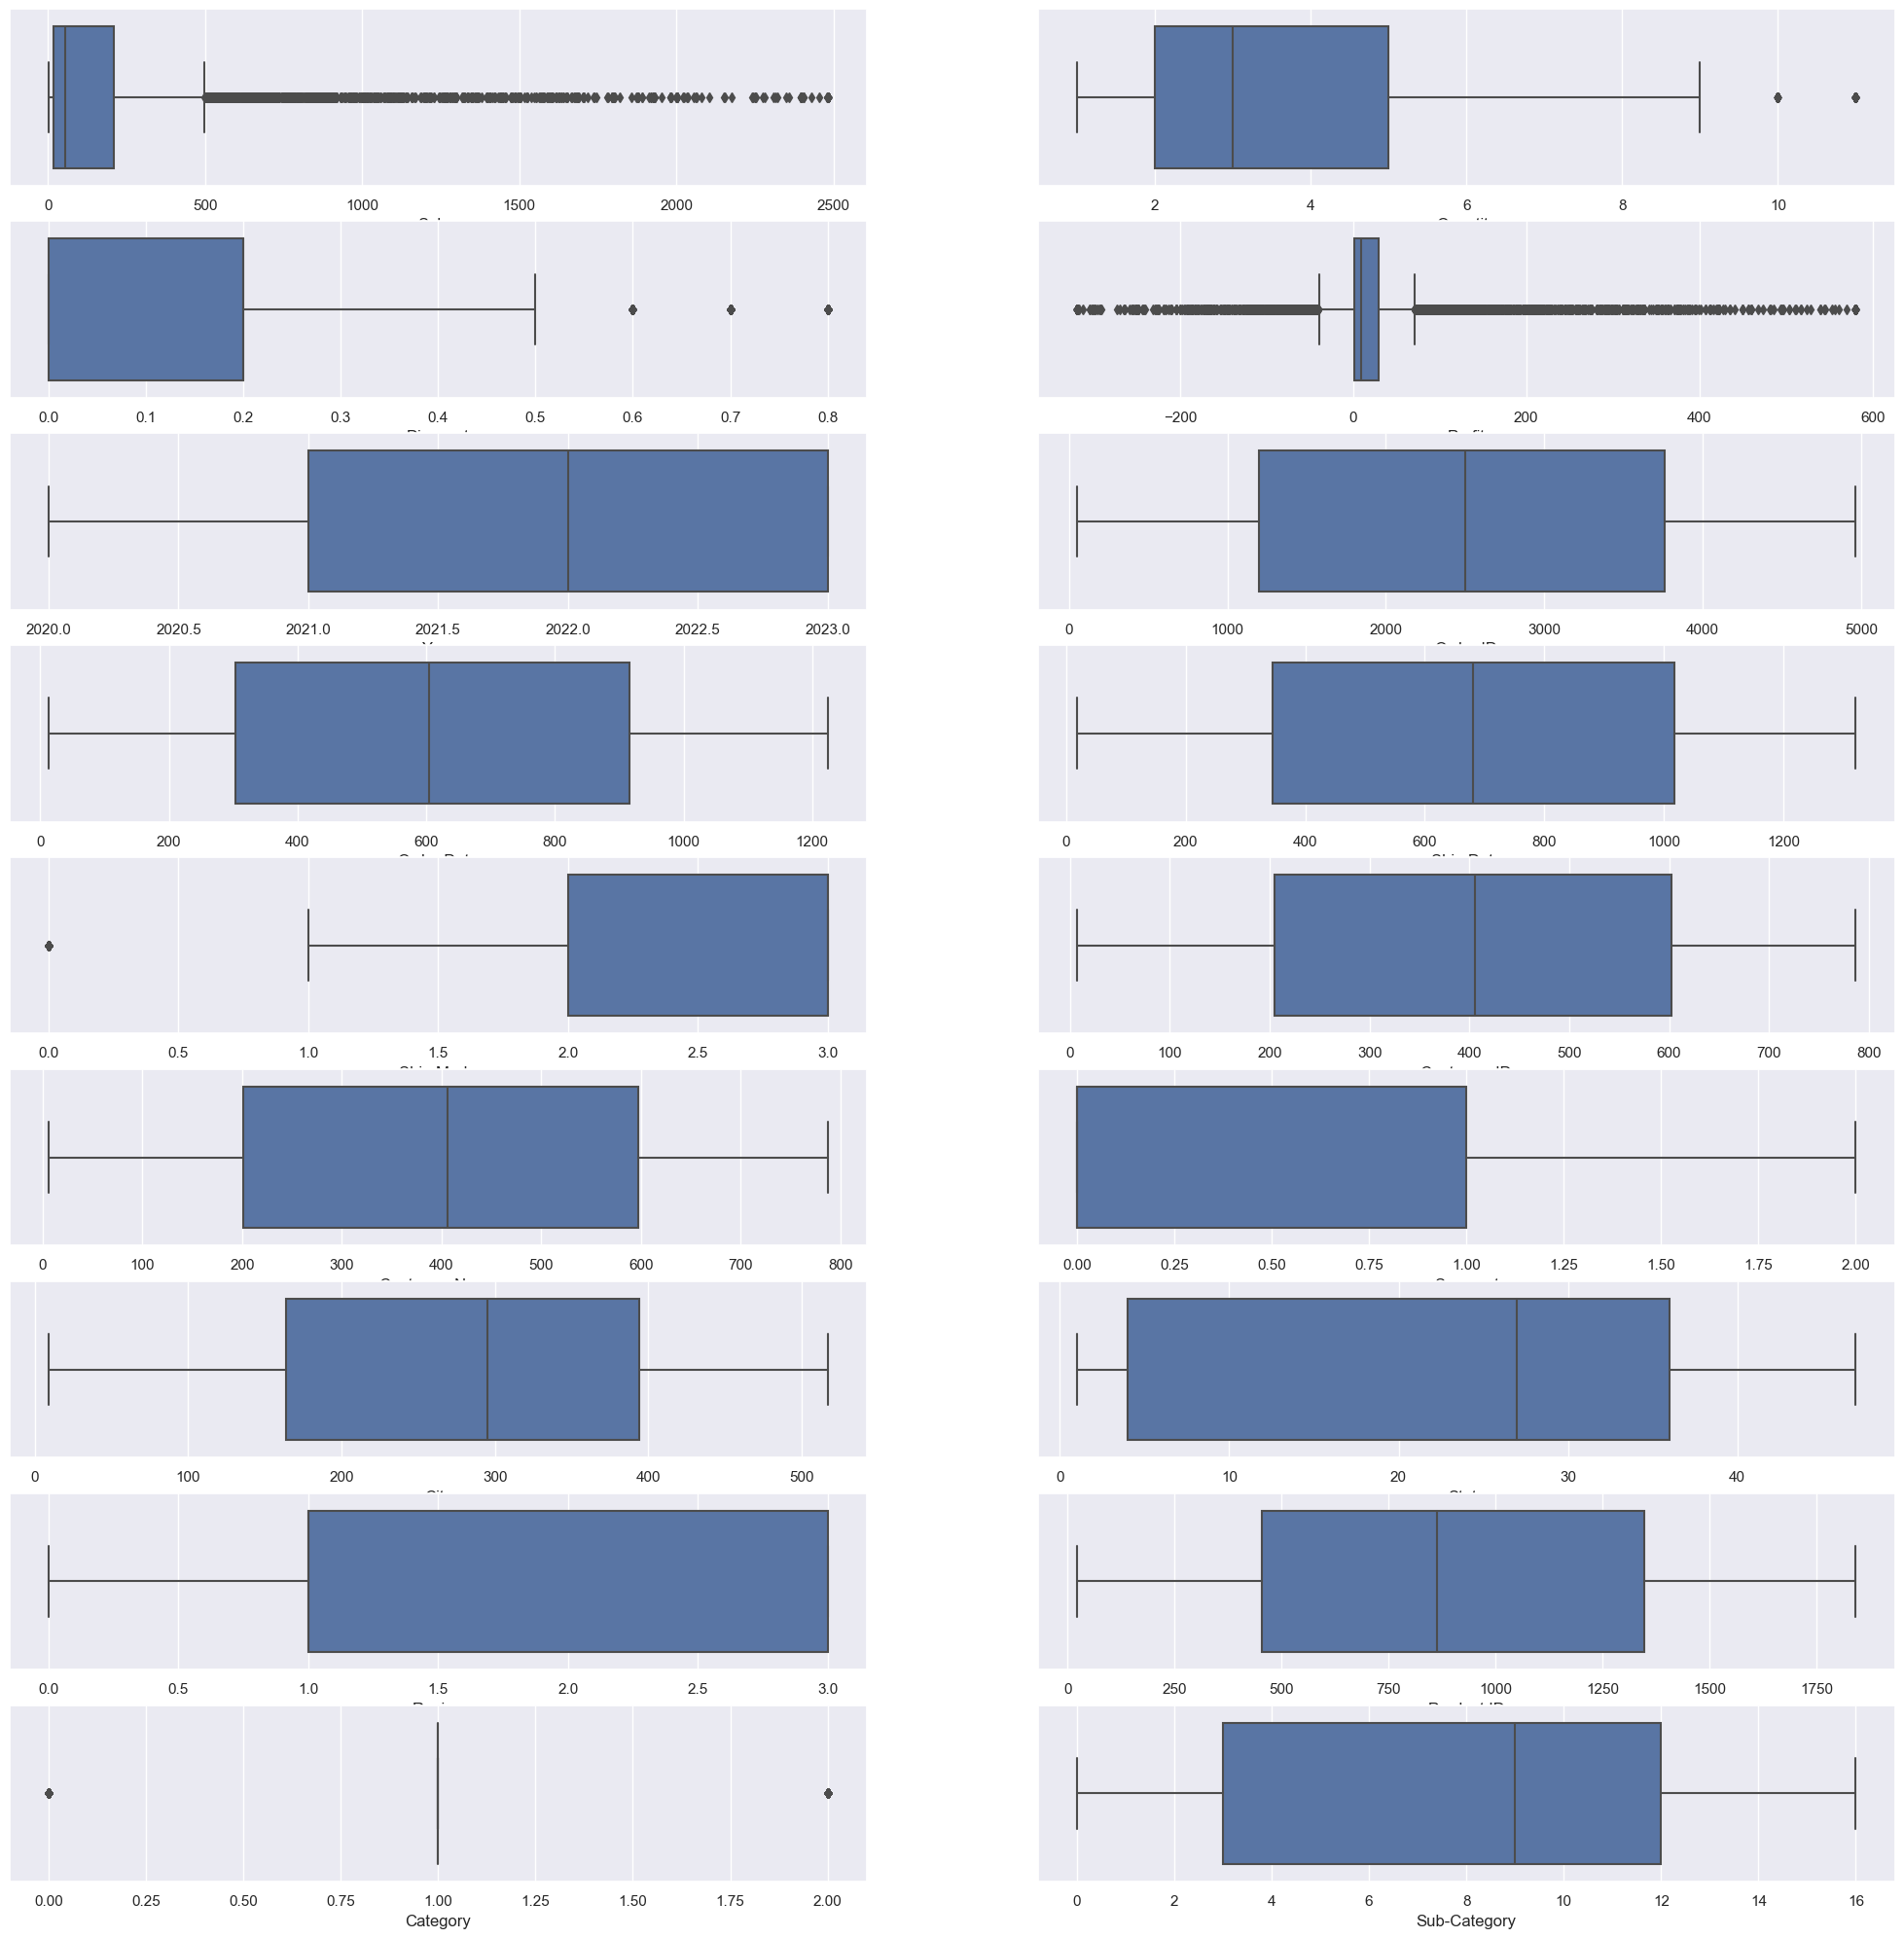

In [47]:
#plotting box plots for outlier detection
fig,ax = plt.subplots(9,2,figsize=(25,25))
sns.set(font_scale = 1)
for var,subplot in zip(data.columns,ax.flatten()):
    sns.boxplot(data[var],ax=subplot)
plt.show()

# Model Building

## Model 1 (using Standard Scalar)

In [48]:
X = data.drop(['Sales','Profit'], axis =1)
Y = data[['Sales','Profit']]
#train test split
x_train, x_test , y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6995, 17)
(2999, 17)
(6995, 2)
(2999, 2)


In [49]:
#standard scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [50]:
#linar regression
model = LinearRegression()
model.fit(X_train, y_train)
print('Coefficients:', model.coef_)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(X_test)
print('R^2 score: ', r2_score(y_test,y_pred))
print('accuracy train :', model.score(X_train, y_train))
print('accuracy test :', model.score(X_test, y_test))
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Coefficients: [[ 1.01165745e+02 -1.07953601e+01 -1.69329987e+00 -1.31742226e+00
   2.90099107e+00  3.71852825e+00 -5.16454418e+00 -3.45035804e+01
   3.82800285e+01  6.83287008e+00 -1.06291230e+00  6.17197749e+00
   8.62281047e+00 -8.49853778e+01  8.48047434e+01  7.02016332e+01
  -1.62606261e+01]
 [ 1.31748356e+01 -3.41379782e+01  2.95228262e+00 -4.65577012e+00
   1.01452389e+00  5.73508910e-02 -2.28202034e+00  7.08730895e+00
  -7.67122900e+00  2.87150553e+00 -2.69638766e+00 -5.48702504e-02
  -1.16705131e-01 -6.75340934e-01  1.31445103e+01 -7.59195886e+00
  -2.18345319e+00]]
Intercept:: True
R^2 score:  0.13935494280421235
accuracy train : 0.12808207456360304
accuracy test : 0.13935494280421235
Training MSE: 71011.70042323027
Test MSE: 83525.11084149429
The model is potentially underfitting.


In [51]:
intercept = model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 205.97724699070776


In [52]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Quantity is 101.16574543789989
The coefficient for Discount is -10.79536014614516
The coefficient for Year is -1.6932998708349687
The coefficient for Order ID is -1.3174222582600028
The coefficient for Order Date is 2.900991066727425
The coefficient for Ship Date is 3.7185282547853005
The coefficient for Ship Mode is -5.164544177993536
The coefficient for Customer ID is -34.50358036958254
The coefficient for Customer Name is 38.280028453226656
The coefficient for Segment is 6.832870083463235
The coefficient for City is -1.062912300743542
The coefficient for State is 6.171977489061412
The coefficient for Region is 8.62281046715068
The coefficient for Product ID is -84.98537778557346
The coefficient for Category is 84.80474343696991
The coefficient for Sub-Category is 70.2016331739106
The coefficient for Product Name is -16.260626112330698


In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
Xp_train_ = poly.fit_transform(X_train)
Xp_test_ = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(Xp_train_, y_train)
y_pred = poly_clf.predict(Xp_test_)
print(poly_clf.score(Xp_test_, y_test))
print(X.shape)
print(Xp_train_.shape)
poly

0.21962410082828387
(9994, 17)
(6995, 154)


PolynomialFeatures(interaction_only=True)

In [54]:
#laaso and ridge regression model
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Ridge model: [[ 1.01162348e+02 -1.07928566e+01 -1.69311035e+00 -1.31924111e+00
   2.89984236e+00  3.71920083e+00 -5.16363673e+00 -3.41210760e+01
   3.78968245e+01  6.83141714e+00 -1.06368825e+00  6.17063921e+00
   8.62102621e+00 -8.48245981e+01  8.46552042e+01  7.01323900e+01
  -1.62635802e+01]
 [ 1.31741646e+01 -3.41360989e+01  2.95199089e+00 -4.65539190e+00
   1.01464048e+00  5.71958130e-02 -2.28193745e+00  7.01195400e+00
  -7.59589764e+00  2.87182790e+00 -2.69590972e+00 -5.49870976e-02
  -1.16165130e-01 -6.67954835e-01  1.31372585e+01 -7.59446158e+00
  -2.18346711e+00]]
Lasso model: [[101.11460748 -10.63572439  -1.6440599   -1.31709112   2.76116279
    3.69131114  -5.03076333  -9.83995218  13.5999722    6.6187712
   -0.93277227   5.90330258   8.3002407  -80.29533199  80.46087508
   68.1803817  -16.24298701]
 [ 13.06301424 -33.99758468   2.61894007  -4.30497888   0.9371265
    0.          -2.17451656  -0.          -0.51364987   2.80921157
   -2.57587507  -0.          -0.           0.

In [55]:
#dtree regressor model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 1.1548089822511671e-29
Test MSE: 103263.90830057979
The model is potentially underfitting.


In [56]:
#random forest regressor model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 5441.348138385591
Test MSE: 60578.763523718124
The model is potentially underfitting.


In [57]:
#KNN regressopr model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 47492.67129678569
Test MSE: 83522.12020897729
The model is potentially underfitting.


##  Model 2 (using Preprocessing)

In [58]:
from sklearn import preprocessing

# scale all the columns of the data. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 
y_scaled = preprocessing.scale(Y)
y_scaled = pd.DataFrame(y_scaled, columns=Y.columns)
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6995, 17)
(2999, 17)
(6995, 2)
(2999, 2)


In [59]:
#linar regression model
model = LinearRegression()
model.fit(xtrain, ytrain)
print('Coefficients:', model.coef_)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(xtest)
print('R^2 score: ', r2_score(ytest,y_pred))
print('accuracy train :', model.score(xtrain, ytrain))
print('accuracy test :', model.score(xtest, ytest))
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Coefficients: [[ 0.27229343 -0.04014585 -0.00713564  0.0037226   0.00203526 -0.00627532
  -0.0101813   0.04044415 -0.02859601  0.01733114 -0.00303139  0.01724696
   0.01204103 -0.25915998  0.25486939  0.19047102 -0.03516897]
 [ 0.15339634 -0.35965771  0.0258237  -0.03130364  0.01028898 -0.01329317
  -0.01167623  0.05978594 -0.0589893   0.02907388 -0.00789618  0.00732502
  -0.01917789 -0.04927071  0.17684085 -0.06135891 -0.01330743]]
Intercept:: True
R^2 score:  0.13995089702823316
accuracy train : 0.12957804893008512
accuracy test : 0.13995089702823316
Training MSE: 0.8716195310935704
Test MSE: 0.856735223727411
The model is potentially overfitting.


In [60]:
for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Quantity is 0.272293429511654
The coefficient for Discount is -0.04014584893653522
The coefficient for Year is -0.007135637724272118
The coefficient for Order ID is 0.0037225985039748928
The coefficient for Order Date is 0.002035264234773789
The coefficient for Ship Date is -0.0062753189489307805
The coefficient for Ship Mode is -0.010181298674644165
The coefficient for Customer ID is 0.0404441482987744
The coefficient for Customer Name is -0.02859600721378814
The coefficient for Segment is 0.017331138413331518
The coefficient for City is -0.003031385496922517
The coefficient for State is 0.017246955269544006
The coefficient for Region is 0.012041033834689999
The coefficient for Product ID is -0.2591599849079138
The coefficient for Category is 0.2548693861992957
The coefficient for Sub-Category is 0.1904710229105173
The coefficient for Product Name is -0.03516896922276677


In [61]:
intercept = model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.003048446125039795


In [62]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
Xp_train_ = poly.fit_transform(xtrain)
Xp_test_ = poly.fit_transform(xtest)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(Xp_train_, ytrain)
y_pred = poly_clf.predict(Xp_test_)
print(poly_clf.score(Xp_test_, ytest))
print(X.shape)
print(Xp_train_.shape)
poly

0.23573562036414525
(9994, 17)
(6995, 154)


PolynomialFeatures(interaction_only=True)

In [63]:
#ridge and lasso rgression
ridge = Ridge(alpha=.3)
ridge.fit(xtrain,ytrain)
print ("Ridge model:", (ridge.coef_))
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
print ("Lasso model:", (lasso.coef_))
print(ridge.score(xtrain, ytrain))
print(ridge.score(xtest, ytest))
print(lasso.score(xtrain, ytrain))
print(lasso.score(xtest, ytest))

Ridge model: [[ 0.27228148 -0.04013751 -0.00713385  0.00371883  0.00203499 -0.0062755
  -0.01018112  0.04011456 -0.02826752  0.01733377 -0.00303119  0.01724541
   0.01204263 -0.25869443  0.25443433  0.19026951 -0.03518039]
 [ 0.15338938 -0.35963766  0.02582202 -0.0313011   0.01028939 -0.01329413
  -0.01167652  0.05918835 -0.05839236  0.02907678 -0.00789361  0.00732409
  -0.01917231 -0.04911879  0.17669614 -0.06141732 -0.01331073]]
Lasso model: [[ 0.17050918 -0.         -0.         -0.          0.         -0.
  -0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.        ]
 [ 0.05272462 -0.24651964  0.         -0.          0.         -0.
  -0.          0.         -0.          0.          0.         -0.
  -0.          0.          0.0459209  -0.         -0.        ]]
0.1295780402489023
0.13994816463737136
0.09844577106780078
0.10443957873833443


In [64]:
#dtree regressor model
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 6.837808458735811e-35
Test MSE: 0.9409841404354263
The model is potentially underfitting.


In [65]:
#Rf regressor model
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.06921378376912604
Test MSE: 0.518774942437553
The model is potentially underfitting.


In [66]:
#KNN Regressor model
model = KNeighborsRegressor()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)
train_mse = mean_squared_error(ytrain, y_train_pred)
test_mse = mean_squared_error(ytest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 0.6001570213910749
Test MSE: 0.893914995820764
The model is potentially underfitting.


## Model 3 (using Feature Selection)

In [67]:
#selecting features with correlation above 0.5
def correlation(dataset, threshold):
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return(col_corr)
corr_features = correlation(x_train, 0.5)
len(set(corr_features))

4

There are 8 positively co related features.

In [68]:
corr_features

{'Category', 'Customer Name', 'Order ID', 'Profit'}

In [80]:
features = data[['Category','Customer Name','Order ID']]
target = data[['Profit','Sales']]
xptrain, xptest, yptrain, yptest = train_test_split(features, target, test_size=0.30, random_state=1)
print(xptrain.shape)
print(xptest.shape)
print(yptrain.shape)
print(yptest.shape)

(6995, 3)
(2999, 3)
(6995, 2)
(2999, 2)


In [81]:
xp_train = scaler.fit_transform(xptrain)
xp_test = scaler.fit_transform(xptest)

In [82]:
#kinar regression model
model = LinearRegression()
model.fit(xp_train, yptrain)
print('Coefficients:', model.coef_)
print('Intercept::', model.fit_intercept)
y_pred = model.predict(xp_test)
print('R^2 score: ', r2_score(yptest,y_pred))
print('accuracy train :', model.score(xp_train, yptrain))
print('accuracy test :', model.score(xp_test, yptest))
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yptrain, y_train_pred)
test_mse = mean_squared_error(yptest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Coefficients: [[15.93873183 -0.68817481 -3.83771264]
 [ 3.72792613  5.51606541 -3.52183887]]
Intercept:: True
R^2 score:  0.011063690966651607
accuracy train : 0.014084066358475589
accuracy test : 0.011063690966651607
Training MSE: 81761.04615897266
Test MSE: 84307.79042007432
The model is potentially underfitting.


In [83]:
for idx, col_name in enumerate(xptrain.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Category is 15.938731830295543
The coefficient for Customer Name is -0.6881748060795732
The coefficient for Order ID is -3.837712641471233


In [84]:
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 27.52562654181558


In [85]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
Xp_train_ = poly.fit_transform(xp_train)
Xp_test_ = poly.fit_transform(xp_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(Xp_train_, yptrain)
y_pred = poly_clf.predict(Xp_test_)
print(poly_clf.score(Xp_test_, yptest))
print(features.shape)
print(Xp_train_.shape)
poly

0.009729731685962195
(9994, 3)
(6995, 7)


PolynomialFeatures(interaction_only=True)

In [86]:
#lasso and ridge regression
ridge = Ridge(alpha=.3)
ridge.fit(xp_train,yptrain)
print ("Ridge model:", (ridge.coef_))
lasso = Lasso(alpha=0.1)
lasso.fit(xp_train,yptrain)
print ("Lasso model:", (lasso.coef_))
print(ridge.score(xp_train, yptrain))
print(ridge.score(xp_test, yptest))
print(lasso.score(xp_train, yptrain))
print(lasso.score(xp_test, yptest))

Ridge model: [[15.93804709 -0.68813585 -3.83754485]
 [ 3.72776844  5.51583179 -3.52168877]]
Lasso model: [[15.8370654  -0.58624754 -3.7365738 ]
 [ 3.62868517  5.41795374 -3.42209018]]
0.014084066332420875
0.011063817371261497
0.01408239219277313
0.01108486571371703


In [87]:
#dtree regressor
model = DecisionTreeRegressor()
model.fit(xp_train, yptrain)
y_pred = model.predict(xp_test)
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yptrain, y_train_pred)
test_mse = mean_squared_error(yptest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 13893.828269673428
Test MSE: 149744.73995806818
The model is potentially underfitting.


In [88]:
#RF regreesor
model = RandomForestRegressor()
model.fit(xp_train, yptrain)
y_pred = model.predict(xp_test)
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yptrain, y_train_pred)
test_mse = mean_squared_error(yptest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 22056.955295354936
Test MSE: 94850.57953879386
The model is potentially underfitting.


In [89]:
#KNN Regressor
model = KNeighborsRegressor()
model.fit(xp_train, yptrain)
y_pred = model.predict(xp_test)
y_train_pred = model.predict(xp_train)
y_test_pred = model.predict(xp_test)
train_mse = mean_squared_error(yptrain, y_train_pred)
test_mse = mean_squared_error(yptest, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
# Check for overfitting or underfitting
if train_mse < test_mse:
    print("The model is potentially underfitting.")
elif train_mse > test_mse:
    print("The model is potentially overfitting.")
else:
    print("The model is performing similarly on both training and validation sets.")

Training MSE: 59133.737278684115
Test MSE: 91640.15785702268
The model is potentially underfitting.


In [90]:
# Summary

The most accurate model and great fit model is achieved by applying Preprocessing Scaling and using Linear Regression algorithm. The RMSE value for both train and test is almost equal and that is 0.47.

The products under sub- categories 'Art', 'Envelopes','Labels','Chairs', 'Paper','Tables','StorageFurnishings','Book Cases','Suppliers', 'Fasteners' and ' Accesories' need more marketing. The products under categoriey 'Furniture' is low on sales.

The factors affecting 'Profit' are 'Sales', 'Discount' and 'Category'. The factors contributing to 'Sales' are 'Discount' and 'Region'.